# Regresión Logística

# 1. Realizar un análisis exploratorio de los datos para identificar relaciones entre variables, valores atípicos, tendencias, etc.

In [529]:
# Realizar un análisis exploratorio de los datos para identificar relaciones entre variables, valores atípicos, tendencias, etc.
import pandas as pd                 # Para la manipulación de datos
import numpy as np                  # Para operaciones numéricas
import matplotlib.pyplot as plt      # Para visualización de datos
import seaborn as sns               # Para visualización de datos mejorada

In [530]:
# Librerías para implementar modelos de ciencia de datos
from sklearn import metrics                   # Para métricas de evaluación
from sklearn.model_selection import train_test_split  # Para dividir datos en conjunto de entrenamiento y prueba
from sklearn.linear_model import LogisticRegression  # Para regresión logística
from sklearn.metrics import classification_report, confusion_matrix  # Para evaluación de modelos

In [531]:
# lectura de datos en Python
# Cargamos el dataset en la variable Datos
Datos = pd.read_csv(r"C:\UNAD\SEMESTRE 7\ANALISIS DE DATOS\TAREA 5\Anexo 6 - Dataset Titanic\Titanic-Dataset.csv")

In [532]:
# Realizamos lectura de los Datos para el análisis exploratorio

Datos.head(40)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [533]:
# Descripción de los datos
# Se obtienen estadísticas descriptivas de los datos
Datos.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


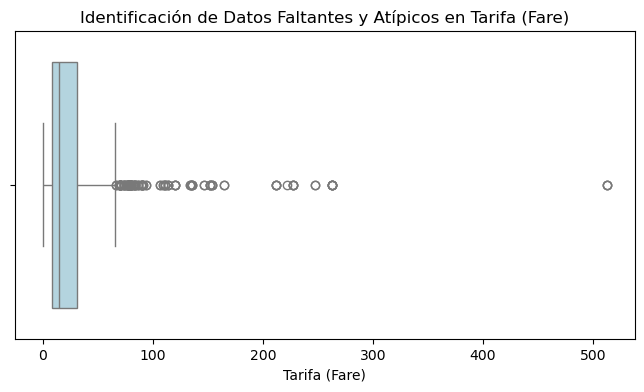

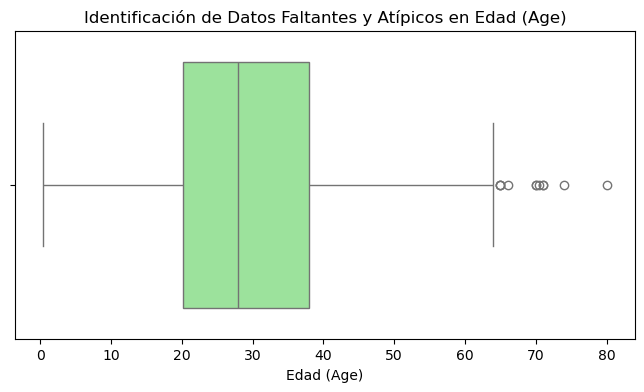

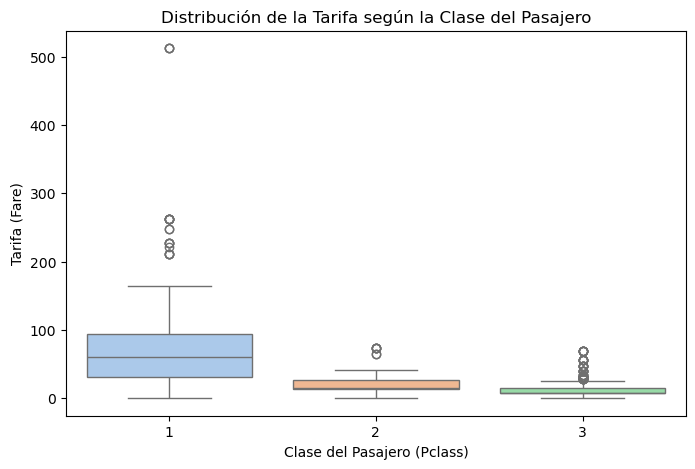

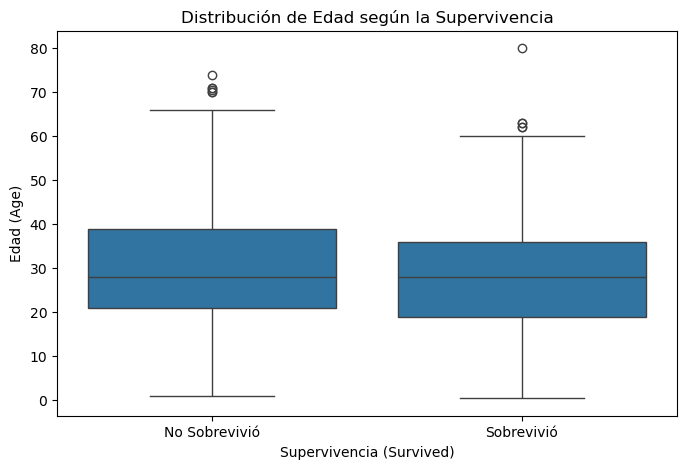

In [534]:
# Identificación de Datos Faltantes y Atípicos en la Tarifa (Fare)
plt.figure(figsize=(8, 4))
sns.boxplot(x=Datos['Fare'], color='lightblue')
plt.title('Identificación de Datos Faltantes y Atípicos en Tarifa (Fare)', fontsize=12)
plt.xlabel('Tarifa (Fare)')
plt.show()

# Identificación de Datos Faltantes y Atípicos en la Edad (Age)
plt.figure(figsize=(8, 4))
sns.boxplot(x=Datos['Age'], color='lightgreen')
plt.title('Identificación de Datos Faltantes y Atípicos en Edad (Age)', fontsize=12)
plt.xlabel('Edad (Age)')
plt.show()

# Distribución de la Tarifa según la Clase del Pasajero
plt.figure(figsize=(8, 5))
sns.boxplot(x='Pclass', y='Fare', data=Datos, hue='Pclass', palette='pastel', legend=False)
plt.title('Distribución de la Tarifa según la Clase del Pasajero', fontsize=12)
plt.xlabel('Clase del Pasajero (Pclass)')
plt.ylabel('Tarifa (Fare)')
plt.show()

# Distribución de Edad según la Supervivencia
plt.figure(figsize=(8, 5))
sns.boxplot(x='Survived', y='Age', data=Datos)
plt.title('Distribución de Edad según la Supervivencia', fontsize=12)
plt.xlabel('Supervivencia (Survived)')
plt.ylabel('Edad (Age)')
plt.xticks([0, 1], ['No Sobrevivió', 'Sobrevivió'])
plt.show()

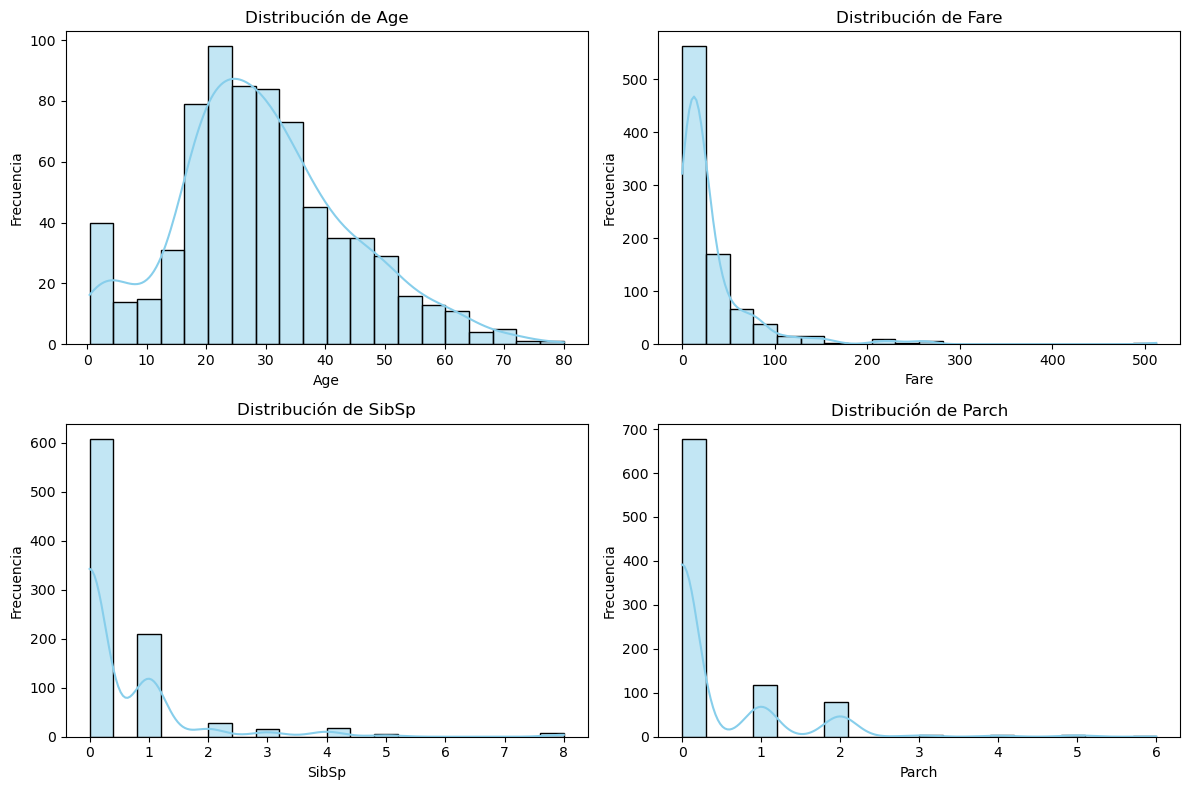

In [535]:
# Graficar histogramas para las variables numéricas
# Selección de variables numéricas del dataset Titanic
variables_numericas = ['Age', 'Fare', 'SibSp', 'Parch']

# Crear la figura para los histogramas
plt.figure(figsize=(12, 8))

# Graficar histogramas para cada variable
for i, col in enumerate(variables_numericas, 1):
    plt.subplot(2, 2, i)
    sns.histplot(Datos[col], kde=True, color='skyblue', bins=20)  # Histograma con KDE
    plt.title(f'Distribución de {col}', fontsize=12)
    plt.xlabel(col, fontsize=10)
    plt.ylabel('Frecuencia', fontsize=10)

# Ajustar el diseño
plt.tight_layout()
plt.show()

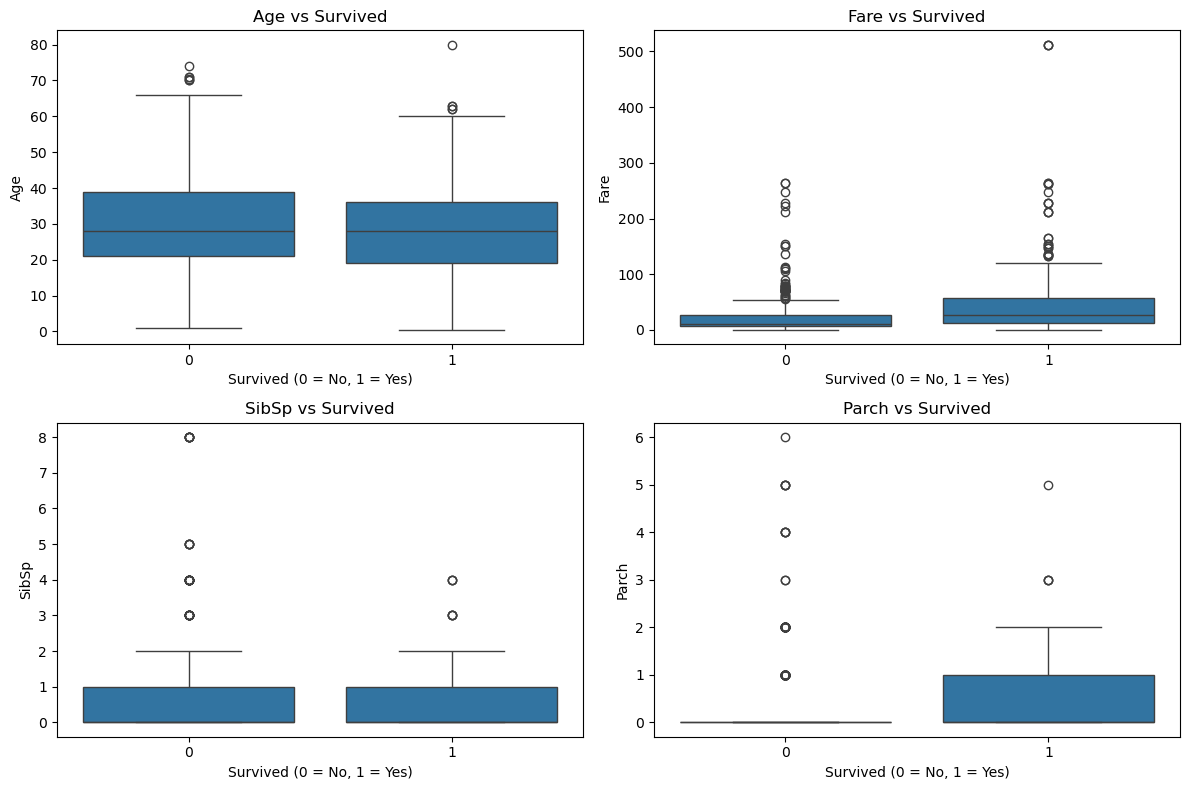

In [536]:
# Variables numéricas relevantes
variables_numericas = ['Age', 'Fare', 'SibSp', 'Parch']

# Configurar la figura para los gráficos
plt.figure(figsize=(12, 8))

# Graficar boxplots para cada variable numérica frente a 'Survived'
for i, col in enumerate(variables_numericas, 1):
    plt.subplot(2, 2, i)
    sns.boxplot(x='Survived', y=col, data=Datos, hue=None)  # Sin usar palette
    plt.title(f'{col} vs Survived', fontsize=12)
    plt.xlabel('Survived (0 = No, 1 = Yes)', fontsize=10)
    plt.ylabel(col, fontsize=10)

# Ajustar el diseño
plt.tight_layout()
plt.show()

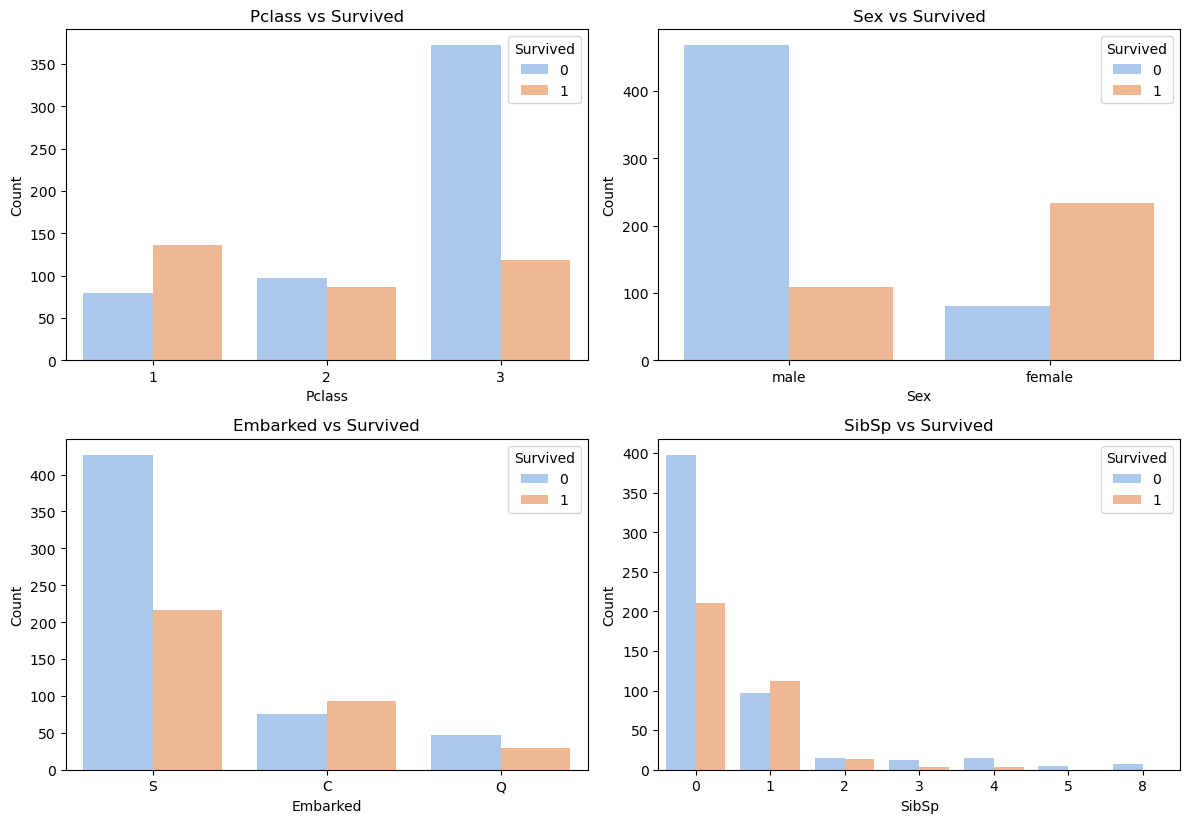

In [537]:
# Variables categóricas del Titanic
variables_categoricas = ['Pclass', 'Sex', 'Embarked', 'SibSp']

# Configuración de la figura para los gráficos
plt.figure(figsize=(12, 12))

# Graficar el conteo de cada variable categórica en relación con 'Survived'
for i, col in enumerate(variables_categoricas, 1):
    plt.subplot(3, 2, i)
    sns.countplot(x=col, hue='Survived', data=Datos, palette='pastel')  # Conteo categórico
    plt.title(f'{col} vs Survived', fontsize=12)
    plt.xlabel(col, fontsize=10)
    plt.ylabel('Count', fontsize=10)

# Ajustar diseño
plt.tight_layout()
plt.show()

In [538]:
# Revisar si hay valores faltantes
# Se imprime la cantidad de valores nulos en cada columna
Datos.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [539]:
# Descripción estadística
print(Datos.describe())

       PassengerId    Survived      Pclass         Age       SibSp  \
count   891.000000  891.000000  891.000000  714.000000  891.000000   
mean    446.000000    0.383838    2.308642   29.699118    0.523008   
std     257.353842    0.486592    0.836071   14.526497    1.102743   
min       1.000000    0.000000    1.000000    0.420000    0.000000   
25%     223.500000    0.000000    2.000000   20.125000    0.000000   
50%     446.000000    0.000000    3.000000   28.000000    0.000000   
75%     668.500000    1.000000    3.000000   38.000000    1.000000   
max     891.000000    1.000000    3.000000   80.000000    8.000000   

            Parch        Fare  
count  891.000000  891.000000  
mean     0.381594   32.204208  
std      0.806057   49.693429  
min      0.000000    0.000000  
25%      0.000000    7.910400  
50%      0.000000   14.454200  
75%      0.000000   31.000000  
max      6.000000  512.329200  


# 2. Preprocesar los datos limpiándolos, tratando valores faltantes y transformándolos según sea necesario

In [541]:
# Revisión de valores nulos en variables clave
print("Cantidad de Registros con valores nulos en 'Age': ", Datos['Age'].isnull().sum())
print("Cantidad de Registros con valores nulos en 'Fare': ", Datos['Fare'].isnull().sum())
print("Cantidad de Registros con valores nulos en 'Embarked': ", Datos['Embarked'].isnull().sum())

# Revisión de valores cero en algunas variables numéricas
print("Cantidad de Registros con cero en 'Age': ", Datos['Age'].isin([0]).sum())  # Aunque no se esperan ceros en 'Age', es útil revisar
print("Cantidad de Registros con cero en 'Fare': ", Datos['Fare'].isin([0]).sum())  # Revisa si hay tarifas cero
print("Cantidad de Registros con cero en 'SibSp' (Hermanos/Cónyuges a bordo): ", Datos['SibSp'].isin([0]).sum())
print("Cantidad de Registros con cero en 'Parch' (Padres/HIjos a bordo): ", Datos['Parch'].isin([0]).sum())

# Para las variables categóricas, como 'Pclass' o 'Sex', verificamos si hay valores nulos
print("Cantidad de Registros con valores nulos en 'Pclass': ", Datos['Pclass'].isnull().sum())
print("Cantidad de Registros con valores nulos en 'Sex': ", Datos['Sex'].isnull().sum())
print("Cantidad de Registros con valores nulos en 'Embarked': ", Datos['Embarked'].isnull().sum())

Cantidad de Registros con valores nulos en 'Age':  177
Cantidad de Registros con valores nulos en 'Fare':  0
Cantidad de Registros con valores nulos en 'Embarked':  2
Cantidad de Registros con cero en 'Age':  0
Cantidad de Registros con cero en 'Fare':  15
Cantidad de Registros con cero en 'SibSp' (Hermanos/Cónyuges a bordo):  608
Cantidad de Registros con cero en 'Parch' (Padres/HIjos a bordo):  678
Cantidad de Registros con valores nulos en 'Pclass':  0
Cantidad de Registros con valores nulos en 'Sex':  0
Cantidad de Registros con valores nulos en 'Embarked':  2


In [542]:
# Reemplazar los ceros con el valor medio (promedio) de las columnas numéricas
# Reemplazar valores nulos de 'Age' con la media de la columna
Datos['Age'] = Datos['Age'].replace(0, Datos['Age'].mean())
Datos['Age'] = Datos['Age'].fillna(Datos['Age'].mean())  # Rellenar valores nulos con la media

# Reemplazar valores nulos en 'Embarked' con la moda (ya que 'Embarked' es categórico)
Datos['Embarked'] = Datos['Embarked'].fillna(Datos['Embarked'].mode()[0])

# Reemplazar ceros en 'Fare' con la media de la columna
Datos['Fare'] = Datos['Fare'].replace(0, Datos['Fare'].mean())

# Reemplazar ceros en 'SibSp' (Hermanos o Cónyuges a bordo) y 'Parch' (Padres/Hijos a bordo) con la moda
Datos['SibSp'] = Datos['SibSp'].replace(0, Datos['SibSp'].mode()[0])
Datos['Parch'] = Datos['Parch'].replace(0, Datos['Parch'].mode()[0])

In [543]:
# Revisión de datos faltantes después de reemplazar los ceros y valores nulos
print("Cantidad de Registros con valores nulos en 'Age': ", Datos['Age'].isnull().sum())
print("Cantidad de Registros con valores nulos en 'Embarked': ", Datos['Embarked'].isnull().sum())
print("Cantidad de Registros con cero en 'Fare': ", Datos['Fare'].isin([0]).sum())
print("Cantidad de Registros con cero en 'SibSp': ", Datos['SibSp'].isin([0]).sum())
print("Cantidad de Registros con cero en 'Parch': ", Datos['Parch'].isin([0]).sum())

Cantidad de Registros con valores nulos en 'Age':  0
Cantidad de Registros con valores nulos en 'Embarked':  0
Cantidad de Registros con cero en 'Fare':  0
Cantidad de Registros con cero en 'SibSp':  608
Cantidad de Registros con cero en 'Parch':  678


In [544]:
# Definir los límites para las variables numéricas del Titanic

# Para la variable 'Age' (edad)
limite_minimo_age = 0
limite_maximo_age = 120
Total_Atipicos_age = ((Datos['Age'] < limite_minimo_age) | (Datos['Age'] > limite_maximo_age)).sum()
print("El total de datos atípicos en 'Age' es {}".format(Total_Atipicos_age))

# Para la variable 'Fare' (tarifa)
limite_minimo_fare = 0
limite_maximo_fare = 500  # Tomando como referencia el rango de tarifas del Titanic
Total_Atipicos_fare = ((Datos['Fare'] < limite_minimo_fare) | (Datos['Fare'] > limite_maximo_fare)).sum()
print("El total de datos atípicos en 'Fare' es {}".format(Total_Atipicos_fare))

# Para la variable 'SibSp' (Hermanos/Cónyuges a bordo)
limite_minimo_sibsp = 0
limite_maximo_sibsp = 8  # El número máximo de hermanos/cónyuges en un solo registro
Total_Atipicos_sibsp = ((Datos['SibSp'] < limite_minimo_sibsp) | (Datos['SibSp'] > limite_maximo_sibsp)).sum()
print("El total de datos atípicos en 'SibSp' es {}".format(Total_Atipicos_sibsp))

# Para la variable 'Parch' (Padres/Hijos a bordo)
limite_minimo_parch = 0
limite_maximo_parch = 6  # El número máximo de padres/hijos en un solo registro
Total_Atipicos_parch = ((Datos['Parch'] < limite_minimo_parch) | (Datos['Parch'] > limite_maximo_parch)).sum()
print("El total de datos atípicos en 'Parch' es {}".format(Total_Atipicos_parch))

El total de datos atípicos en 'Age' es 0
El total de datos atípicos en 'Fare' es 3
El total de datos atípicos en 'SibSp' es 0
El total de datos atípicos en 'Parch' es 0


In [545]:
# Filtrar los datos atípicos en las variables relevantes

# Filtrar 'Age' (edad)
Datos = Datos[(Datos['Age'] <= limite_maximo_age) & (Datos['Age'] >= limite_minimo_age)]

# Filtrar 'Fare' (tarifa)
Datos = Datos[(Datos['Fare'] <= limite_maximo_fare) & (Datos['Fare'] >= limite_minimo_fare)]

# Filtrar 'SibSp' (Hermanos/Cónyuges a bordo)
Datos = Datos[(Datos['SibSp'] <= limite_maximo_sibsp) & (Datos['SibSp'] >= limite_minimo_sibsp)]

# Filtrar 'Parch' (Padres/Hijos a bordo)
Datos = Datos[(Datos['Parch'] <= limite_maximo_parch) & (Datos['Parch'] >= limite_minimo_parch)]

In [546]:
# Validar si se removieron los datos atípicos (Age)
Total_Atipicos_age_filtrados = ((Datos['Age'] < limite_minimo_age) | (Datos['Age'] > limite_maximo_age)).sum()
print("El total de datos atípicos en 'Age' después de filtrar es {}".format(Total_Atipicos_age_filtrados))

# Validar si se removieron los datos atípicos (Fare)
Total_Atipicos_fare_filtrados = ((Datos['Fare'] < limite_minimo_fare) | (Datos['Fare'] > limite_maximo_fare)).sum()
print("El total de datos atípicos en 'Fare' después de filtrar es {}".format(Total_Atipicos_fare_filtrados))

# Validar si se removieron los datos atípicos (SibSp)
Total_Atipicos_sibsp_filtrados = ((Datos['SibSp'] < limite_minimo_sibsp) | (Datos['SibSp'] > limite_maximo_sibsp)).sum()
print("El total de datos atípicos en 'SibSp' después de filtrar es {}".format(Total_Atipicos_sibsp_filtrados))

# Validar si se removieron los datos atípicos (Parch)
Total_Atipicos_parch_filtrados = ((Datos['Parch'] < limite_minimo_parch) | (Datos['Parch'] > limite_maximo_parch)).sum()
print("El total de datos atípicos en 'Parch' después de filtrar es {}".format(Total_Atipicos_parch_filtrados))

El total de datos atípicos en 'Age' después de filtrar es 0
El total de datos atípicos en 'Fare' después de filtrar es 0
El total de datos atípicos en 'SibSp' después de filtrar es 0
El total de datos atípicos en 'Parch' después de filtrar es 0


In [547]:
#Revisión del tipo de datos y datos faltantes

Datos.info()

<class 'pandas.core.frame.DataFrame'>
Index: 888 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  888 non-null    int64  
 1   Survived     888 non-null    int64  
 2   Pclass       888 non-null    int64  
 3   Name         888 non-null    object 
 4   Sex          888 non-null    object 
 5   Age          888 non-null    float64
 6   SibSp        888 non-null    int64  
 7   Parch        888 non-null    int64  
 8   Ticket       888 non-null    object 
 9   Fare         888 non-null    float64
 10  Cabin        202 non-null    object 
 11  Embarked     888 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 90.2+ KB


# 3. Seleccionar las características más relevantes para entrenar el modelo utilizando selección de características

Características de interés:

    Survived: Indica si el pasajero sobrevivió o no (0 = no sobrevivió, 1 = sobrevivió)
    Pclass: Clase del pasajero (1, 2, 3)
    Sex: Sexo del pasajero (male, female)
    Age: Edad del pasajero
    SibSp: Número de hermanos o cónyuges a bordo
    Parch: Número de padres o hijos a bordo
    Fare: Tarifa pagada por el pasajero
    Embarked: Puerto de embarque (C = Cherbourg, Q = Queenstown, S = Southampton)

Objetivo: Predecir si un pasajero sobrevivió o no al naufragio

Características relevantes seleccionadas:

    Pclass: La clase en la que viajaba el pasajero puede influir en sus probabilidades de supervivencia.
    Sex: El sexo es una característica importante, ya que históricamente las mujeres tuvieron más probabilidades de sobrevivir.
    Age: La edad podría influir, ya que los niños, por ejemplo, tuvieron una mayor probabilidad de ser salvados.
    SibSp: El número de hermanos o cónyuges a bordo puede reflejar las condiciones familiares del pasajero.
    Parch: Similar a SibSp, el número de padres o hijos a bordo también podría tener influencia en la supervivencia.
    Fare: La tarifa podría ser indicativa del nivel socioeconómico del pasajero, lo que podría estar relacionado con su probabilidad de supervivencia.
    Embarked: El puerto de embarque podría estar relacionado con el lugar donde se encontraba el pasajero en el barco.

In [550]:
# Total de personas que sobrevivieron (1) y no sobrevivieron (0)
print(Datos['Survived'].value_counts())

Survived
0    549
1    339
Name: count, dtype: int64


In [551]:
Datos[['Survived']].head(40)

,Survived
0,0
1,1
2,1
3,1
4,0
5,0
6,0
7,0
8,1
9,1


# 4. Dividir el dataset en Train y Test para evaluar correctamente el modelo

In [553]:
# Porcentaje de datos para entrenamiento (train) = 75% , y para prueba (test) = 25%

# Se crean variables X y Y para almacenar la información del entrenamiento
# Se eliminan las columnas 'Survived', 'Name' y 'Sex' de los datos X
X = Datos.drop(['Survived', 'Name', 'Sex', 'Ticket', 'Cabin', 'Embarked'], axis=1)  # Eliminar las columnas 'Survived', 'Name' y 'Sex'
Y = Datos['Survived']  # Se cargan los datos de train con la columna 'condition'
# División en conjunto de entrenamiento y prueba
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.25, stratify=Y, random_state=0)

In [554]:
print (X_train)

     PassengerId  Pclass        Age  SibSp  Parch     Fare
671          672       1  31.000000      1      0  52.0000
488          489       3  30.000000      0      0   8.0500
634          635       3   9.000000      3      2  27.9000
21            22       2  34.000000      0      0  13.0000
418          419       2  30.000000      0      0  13.0000
..           ...     ...        ...    ...    ...      ...
131          132       3  20.000000      0      0   7.0500
490          491       3  29.699118      1      0  19.9667
528          529       3  39.000000      0      0   7.9250
48            49       3  29.699118      2      0  21.6792
80            81       3  22.000000      0      0   9.0000

[666 rows x 6 columns]


In [555]:
print (Y_train)

671    0
488    0
634    0
21     1
418    0
      ..
131    0
490    0
528    0
48     0
80     0
Name: Survived, Length: 666, dtype: int64


# 5. Entrenar el modelo configurando los diferentes hiperparámetros

In [557]:
# Construir el modelo de regresión logística 

modelo_regresion = LogisticRegression(solver = "liblinear") # liblinear es una libreria para resolver problemas lineales de clasificación y regresión
modelo_regresion.fit (X_train , Y_train)   

# Crea el modelo de prediccion
Prediccion = modelo_regresion.predict(X_test) # la función predict predice los valores a partir del conjunto de datos de validación

In [583]:
print (Y_test)

654    0
319    1
182    0
684    0
600    1
      ..
882    0
434    0
304    0
500    0
633    0
Name: Survived, Length: 222, dtype: int64


In [585]:
print (Prediccion)

[0 1 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 1 0 1
 1 0 0 0 0 0 0 0 0 0 1 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 0 0 1
 1 1 1 0 0 0 1 0 0 0 1 0 1 0 1 0 0 0 1 0 1 0 0 0 0 1 0 0 1 0 0 1 0 0 0 0 1
 0 0 1 0 1 0 0 0 0 1 1 1 0 0 0 0 1 0 1 1 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0 0
 0 0 1 0 0 0 0 0 1 1 0 0 0 0 1 0 1 0 0 0 1 0 0 0 1 0 0 0 1 0 1 0 0 0 0 1 0
 0 0 0 0 0 1 1 0 0 1 0 0 0 0 1 0 0 0 1 0 1 1 0 0 0 0 0 0 1 0 0 1 0 0 0 0 1]


# 6. Evaluar el desempeño del modelo en el conjunto de Test con métricas como precisión, recall, F1-score, etc

In [588]:
# Desempeño del modelo de regresión

print(classification_report(Y_test,Prediccion))

              precision    recall  f1-score   support

           0       0.72      0.86      0.78       137
           1       0.67      0.45      0.54        85

    accuracy                           0.70       222
   macro avg       0.69      0.65      0.66       222
weighted avg       0.70      0.70      0.69       222



# 7. Realizar las diferentes gráficas que permitan visualizar los resultados del modelo

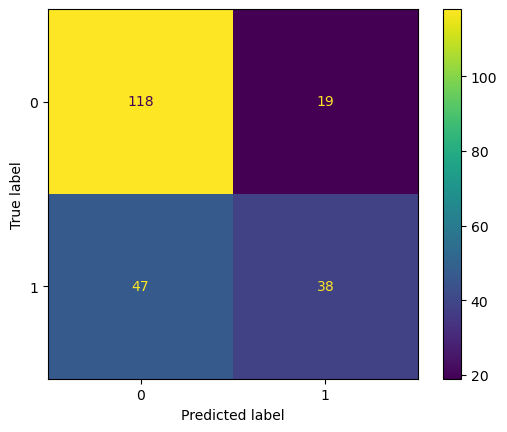

In [591]:
#Matrix de Confusión del modelo

cm=confusion_matrix(Y_test,Prediccion)
disp=metrics.ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()

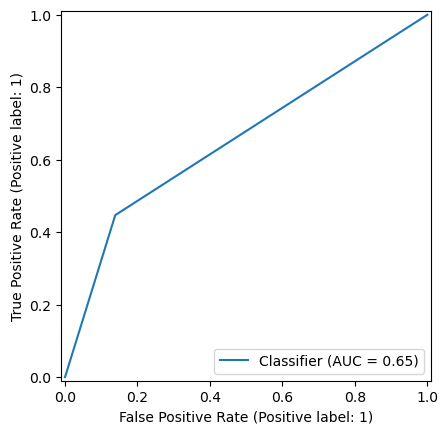

In [593]:
# Curva de precisón del modelo

from sklearn.metrics import RocCurveDisplay
RocCurveDisplay.from_predictions(Y_test, Prediccion)
plt.show()

# 8. Interpretar, analizar y documentar los resultados obtenidos

**Interpretación de los resultados**

**1. Curva ROC y AUC (Área bajo la curva):**

- La curva ROC (Receiver Operating Characteristic) muestra el desempeño del modelo en términos de la Tasa de Verdaderos Positivos (True Positive Rate) contra la Tasa de Falsos Positivos (False Positive Rate).

- El valor del AUC es 0.65, lo que indica que el modelo tiene una capacidad moderada para distinguir entre las clases (supervivientes y no supervivientes). Sin embargo, no es un modelo altamente confiable, ya que un AUC cercano a 0.5 implicaría un desempeño aleatorio.

**2. Reporte de clasificación:**

- Precisión (Precision): Por cada clase, mide cuántas predicciones positivas fueron correctas.

- Para la clase 0 (no sobrevivientes): 72%.

- Para la clase 1 (sobrevivientes): 67%.

- Recall (Sensibilidad o Tasa de Verdaderos Positivos): Indica cuántos de los casos positivos reales fueron identificados correctamente.

- Para la clase 0: 86%.

- Para la clase 1: 45% (bastante bajo).

- F1-Score: Es la media armónica entre precisión y recall.

- Para la clase 0: 78%.

- Para la clase 1: 54%.

- Exactitud general (Accuracy): El modelo tiene una exactitud general del 70%, lo que significa que 7 de cada 10 predicciones son correctas.

- Macro avg (promedio no ponderado): 69% de precisión y 65% de sensibilidad.

- Weighted avg (ponderado por la proporción de clases): Similar al accuracy con un F1-score de 70%.

**3. Matriz de confusión:**

- Muestra el número de predicciones correctas e incorrectas para cada clase.

- Clase 0 (no sobrevivientes):

- 118 predicciones correctas.

- 47 incorrectas (predichos como sobrevivientes cuando no lo son).

- Clase 1 (sobrevivientes):

- 38 predicciones correctas.

- 19 incorrectas (predichos como no sobrevivientes cuando sí lo son).

- Esto indica que el modelo es mejor prediciendo la clase 0 (no sobrevivientes) que la clase 1 (sobrevivientes).

**Análisis y documentación**

**1. Desempeño del modelo:**

- El modelo presenta un desempeño moderado. La capacidad para identificar a los sobrevivientes (clase 1) es baja, lo que podría ser crítico dependiendo del objetivo del modelo (por ejemplo, priorizar la supervivencia).

- Es necesario mejorar el recall de la clase 1, ya que el modelo pierde muchos casos de supervivientes reales.

**2. Características del dataset (Titanic):**

- Variables como Sex, Age, Pclass y Fare podrían ser las más relevantes para predecir la supervivencia.

- Los valores faltantes (blanks) en columnas como Age o Cabin podrían afectar el desempeño del modelo. Es importante manejar estos valores con imputación adecuada.

**3. Posibles causas de bajo desempeño:**

- Desbalance de clases: Si la proporción entre sobrevivientes y no sobrevivientes es desigual, podría afectar la capacidad del modelo para aprender de la clase minoritaria.

- Falta de características importantes: Algunas columnas como Name o Ticket pueden no tener relación directa con la supervivencia y podrían ser descartadas.

- Selección de variables no optimizada: Revisar la contribución de cada variable para evitar ruido innecesario.

**4. Recomendaciones:**

- Manejo de desbalance de clases: Aplicar técnicas como sobremuestreo (oversampling) de la clase minoritaria, submuestreo (undersampling) de la clase mayoritaria, o ajuste de pesos en la función de pérdida.

- Optimización de hiperparámetros: Realizar una búsqueda más exhaustiva de hiperparámetros para mejorar la capacidad predictiva del modelo.

- Incorporación de más características: Crear variables derivadas o realizar ingeniería de características para mejorar la representatividad del modelo.

- Evaluar otros algoritmos: Considerar modelos como árboles de decisión, bosques aleatorios (Random Forest) o XGBoost, que podrían captar mejor relaciones no lineales en los datos.

**Conclusión**

El modelo de regresión logística muestra una precisión general del 70% al predecir la supervivencia en el Titanic, con un desempeño desigual entre las dos clases. Para los pasajeros sobrevivientes (clase 1), el modelo tiene una precisión del 67%, pero su capacidad para identificarlos correctamente es limitada, con un recall bajo de 45% y un F1-score de 54%. En cambio, para los no sobrevivientes (clase 0), la precisión es más alta (72%) y el recall es excelente (86%), lo que sugiere que el modelo tiende a clasificar mejor la clase mayoritaria. Estos resultados reflejan un sesgo hacia la clase negativa debido al desequilibrio en el dataset, lo que puede mejorar mediante técnicas de balanceo de datos o exploración de modelos más complejos para obtener mejores predicciones, especialmente para la clase minoritaria de sobrevivientes.